In [1]:
from typing import TypedDict, Annotated, Literal, Dict, Any
from langgraph.graph import StateGraph, END
import json

# Define the state schema
class HumanInTheLoopState(TypedDict):
    question: str  # User's original question
    ai_draft: str  # AI's initial response draft
    human_feedback: str  # Human reviewer's feedback
    final_response: str  # Final response after incorporating feedback

In [ ]:
# Create nodes for our workflow
def draft_response(state: Dict[str, Any]) -> Dict[str, Any]:
    """AI drafts an initial response to the user's question"""
    question = state["question"]
    # In a real application, this would use an LLM to generate a response
    draft = f"DRAFT: Here's my initial answer to: '{question}'"
    
    print(f"\n🤖 AI has drafted a response: {draft}\n")
    return {"ai_draft": draft}


def get_human_feedback(state: Dict[str, Any]) -> Dict[str, Any]:
    """Collect feedback from a human reviewer"""
    # In a real application, this would be implemented with a UI
    # or messaging platform to collect human input
    print("\n👋 HUMAN REVIEW REQUIRED!\n")
    print(f"Original question: {state['question']}")
    print(f"AI draft: {state['ai_draft']}")
    # Simulating human input via console
    feedback = input("\nPlease provide feedback or type 'approve' to accept: ")
    
    print(f"\n👤 Human provided feedback: {feedback}\n")
    return {"human_feedback": feedback}


def decide_next_step(state: Dict[str, Any]) -> Literal["revise", "finalize"]:
    """Decide whether to revise the response or finalize it"""
    if state["human_feedback"].lower() == "approve":
        return "finalize"
    else:
        return "revise"
    
def revise_response(state: Dict[str, Any]) -> Dict[str, Any]:
    """Revise the response based on human feedback"""
    # In a real application, this would use an LLM to incorporate feedback
    revised_response = f"REVISED: I've updated my answer based on feedback: '{state['human_feedback']}'"
    
    print(f"\n🤖 AI has revised the response: {revised_response}\n")
    return {"ai_draft": revised_response}

def finalize_response(state: Dict[str, Any]) -> Dict[str, Any]:
    """Finalize the response and return to the user"""
    final = f"FINAL: {state['ai_draft']}"
    
    print(f"\n✅ Final response ready: {final}\n")
    return {"final_response": final}

In [4]:
def create_hitl_graph():
    # Initialize the graph
    graph = StateGraph(HumanInTheLoopState)
    
    # Add nodes
    graph.add_node("draft", draft_response)
    graph.add_node("human_review", get_human_feedback)  # Renamed from "human_feedback"
    graph.add_node("revise", revise_response)
    graph.add_node("finalize", finalize_response)
    
    # Define the flow
    graph.add_edge("draft", "human_review")
    graph.add_conditional_edges(
        "human_review",
        decide_next_step,
        {
            "revise": "revise",
            "finalize": "finalize"
        }
    )
    graph.add_edge("revise", "human_review")
    graph.add_edge("finalize", END)
    
    # Set the entry point
    graph.set_entry_point("draft")
    
    return graph.compile()


In [5]:
workflow = create_hitl_graph()

In [8]:
from IPython.display import Image
print(workflow.get_graph().draw_mermaid())

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	draft(draft)
	human_review(human_review)
	revise(revise)
	finalize(finalize)
	__end__([<p>__end__</p>]):::last
	__start__ --> draft;
	draft --> human_review;
	human_review -.-> finalize;
	human_review -.-> revise;
	revise --> human_review;
	finalize --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



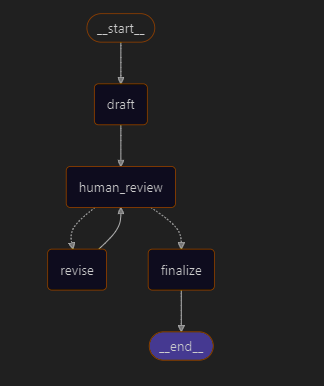

In [10]:
if __name__ == "__main__":
    # Create the workflow
    workflow = create_hitl_graph()
    
    # Initial state with a user question
    initial_state = {
        "question": "What's the best way to implement HITL systems?",
        "ai_draft": "",
        "human_feedback": "",
        "final_response": ""
    }
    
    # Run the workflow
    for output in workflow.stream(initial_state):
        # In a production application, you would handle these events appropriately
        pass
        
    # Final state contains the complete conversation
    print("\n=== WORKFLOW COMPLETED ===")


🤖 AI has drafted a response: DRAFT: Here's my initial answer to: 'What's the best way to implement HITL systems?'


👋 HUMAN REVIEW REQUIRED!

Original question: What's the best way to implement HITL systems?
AI draft: DRAFT: Here's my initial answer to: 'What's the best way to implement HITL systems?'

👤 Human provided feedback: need more clarity


🤖 AI has revised the response: REVISED: I've updated my answer based on feedback: 'need more clarity'


👋 HUMAN REVIEW REQUIRED!

Original question: What's the best way to implement HITL systems?
AI draft: REVISED: I've updated my answer based on feedback: 'need more clarity'

👤 Human provided feedback: still some...


🤖 AI has revised the response: REVISED: I've updated my answer based on feedback: 'still some...'


👋 HUMAN REVIEW REQUIRED!

Original question: What's the best way to implement HITL systems?
AI draft: REVISED: I've updated my answer based on feedback: 'still some...'

👤 Human provided feedback: hh


🤖 AI has revised the resp

## Implement the below article:
> https://freedium.cfd/https://medium.com/@kbdhunga/implementing-human-in-the-loop-with-langgraph-ccfde023385c